In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import fcluster, linkage
import math
from sklearn.metrics import accuracy_score

In [11]:
class SOM:
    def __init__(self, n, c):
        self.n = n
        self.c = c
        self.a = [0 for _ in range(n)]

    def calculate_a(self, i):
        return (50 - i) / 100

    def winner(self, weights, sample):
        d0 = 0
        d1 = 0
        for i in range(len(sample)):
            d0 += math.pow((sample[i] - weights[0][i]), 2)
            d1 += math.pow((sample[i] - weights[1][i]), 2)

        if d0 > d1:
            return 0
        else:
            return 1

    def update(self, weights, sample, j):
        for i in range(len(weights)):
            weights[j][i] = weights[j][i] + 0.5 * (sample[i] - weights[j][i])

        print(f'\nШаг для {j} кластера = {self.calculate_a(self.a[j])}')
        self.a[j] += 1
        print(f'Веса после обновления:')
        print(weights)

        return weights

In [5]:
def update_cluster_centers(X, c):
    centers = np.zeros((2, 2))
    for i in range(1, 3):
        ix = np.where(c == i)
        centers[i - 1, :] = np.mean(X[ix, :], axis=1)
    return centers

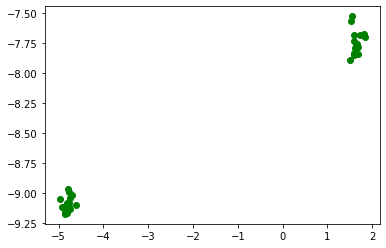

In [4]:
X, y = make_blobs(n_samples=30, centers=2, random_state=68, cluster_std=0.1)
plt.scatter(X[:, 0], X[:, 1], c='green')

In [7]:
mergings = linkage(X, method='ward')
clusterf = fcluster(mergings, 2, criterion='maxclust')
clusters = update_cluster_centers(X, clusterf)
print(clusters)

[[-4.79732245 -9.08991641]
 [ 1.64135482 -7.73788514]]


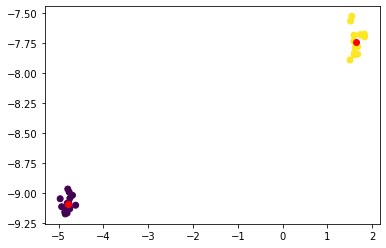

In [9]:
plt.scatter(X[:, 0], X[:, 1], c=clusterf)
plt.scatter(clusters[:, 0], clusters[:, 1], c='red')

In [12]:
np.random.shuffle(X)
m, n, C = len(X), len(X[0]), 2
weights = np.random.normal(100, 10, size=(n, C)) / 100
print(weights)

[[0.84647396 1.12413989]
 [0.86981718 0.7456566 ]]


In [14]:
som = SOM(n, C)
for j in range(100):
    for i in range(m):
        sample = X[i]
        J = som.winner(weights, sample)
        weights = som.update(weights, sample, J)


Шаг для 0 кластера = 0.5
Веса после обновления:
[[-1.96330902 -3.99519532]
 [ 0.86981718  0.7456566 ]]

Шаг для 1 кластера = 0.5
Веса после обновления:
[[-1.96330902 -3.99519532]
 [-2.03163289 -4.18495916]]

Шаг для 0 кластера = 0.49
Веса после обновления:
[[-0.15599239 -5.87739325]
 [-2.03163289 -4.18495916]]

Шаг для 1 кластера = 0.49
Веса после обновления:
[[-0.15599239 -5.87739325]
 [-3.3260222  -6.6438944 ]]

Шаг для 0 кластера = 0.48
Веса после обновления:
[[-2.46405355 -7.48200901]
 [-3.3260222  -6.6438944 ]]

Шаг для 1 кластера = 0.48
Веса после обновления:
[[-2.46405355 -7.48200901]
 [-0.79778697 -7.1617139 ]]

Шаг для 0 кластера = 0.47
Веса после обновления:
[[-0.45901453 -7.5040924 ]
 [-0.79778697 -7.1617139 ]]

Шаг для 0 кластера = 0.46
Веса после обновления:
[[-2.63404091 -8.29548454]
 [-0.79778697 -7.1617139 ]]

Шаг для 1 кластера = 0.47
Веса после обновления:
[[-2.63404091 -8.29548454]
 [-2.80469226 -8.16510998]]

Шаг для 0 кластера = 0.45
Веса после обновления:
[[-3.70

Веса после обновления:
[[-2.80304001 -8.70396683]
 [-3.70673336 -8.78941851]]

Шаг для 0 кластера = -1.8
Веса после обновления:
[[-3.79967468 -8.83591515]
 [-3.70673336 -8.78941851]]

Шаг для 1 кластера = -1.8
Веса после обновления:
[[-3.79967468 -8.83591515]
 [-4.22861365 -8.91727088]]

Шаг для 1 кластера = -1.81
Веса после обновления:
[[-3.79967468 -8.83591515]
 [-1.27523201 -8.38006754]]

Шаг для 0 кластера = -1.81
Веса после обновления:
[[-1.14011282 -8.20084564]
 [-1.27523201 -8.38006754]]

Шаг для 1 кластера = -1.82
Веса после обновления:
[[-1.14011282 -8.20084564]
 [ 0.17296048 -8.08389674]]

Шаг для 1 кластера = -1.83
Веса после обновления:
[[-1.14011282 -8.20084564]
 [-2.34530949 -8.62140632]]

Шаг для 0 кластера = -1.82
Веса после обновления:
[[-2.97018609 -8.66698155]
 [-2.34530949 -8.62140632]]

Шаг для 1 кластера = -1.84
Веса после обновления:
[[-2.97018609 -8.66698155]
 [-3.59937746 -8.89846686]]

Шаг для 0 кластера = -1.83
Веса после обновления:
[[-3.83117517 -8.84341963

Веса после обновления:
[[-1.27523201 -8.38006754]
 [-3.79967468 -8.83591515]]

Шаг для 1 кластера = -3.45
Веса после обновления:
[[-1.27523201 -8.38006754]
 [-1.14011282 -8.20084564]]

Шаг для 0 кластера = -3.48
Веса после обновления:
[[ 0.17296048 -8.08389674]
 [-1.14011282 -8.20084564]]

Шаг для 0 кластера = -3.49
Веса после обновления:
[[-2.34530949 -8.62140632]
 [-1.14011282 -8.20084564]]

Шаг для 1 кластера = -3.46
Веса после обновления:
[[-2.34530949 -8.62140632]
 [-2.97018609 -8.66698155]]

Шаг для 0 кластера = -3.5
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-2.97018609 -8.66698155]]

Шаг для 1 кластера = -3.47
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-3.83117517 -8.84341963]]

Шаг для 1 кластера = -3.48
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -3.51
Веса после обновления:
[[-1.0046002  -8.31594169]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -3.52
Веса после обновления:
[[-2.98560307 -8.6824582

Шаг для 0 кластера = -5.41
Веса после обновления:
[[-1.14011282 -8.20084564]
 [-1.27523201 -8.38006754]]

Шаг для 1 кластера = -5.42
Веса после обновления:
[[-1.14011282 -8.20084564]
 [ 0.17296048 -8.08389674]]

Шаг для 1 кластера = -5.43
Веса после обновления:
[[-1.14011282 -8.20084564]
 [-2.34530949 -8.62140632]]

Шаг для 0 кластера = -5.42
Веса после обновления:
[[-2.97018609 -8.66698155]
 [-2.34530949 -8.62140632]]

Шаг для 1 кластера = -5.44
Веса после обновления:
[[-2.97018609 -8.66698155]
 [-3.59937746 -8.89846686]]

Шаг для 0 кластера = -5.43
Веса после обновления:
[[-3.83117517 -8.84341963]
 [-3.59937746 -8.89846686]]

Шаг для 0 кластера = -5.44
Веса после обновления:
[[-1.11436113 -8.34589554]
 [-3.59937746 -8.89846686]]

Шаг для 1 кластера = -5.45
Веса после обновления:
[[-1.11436113 -8.34589554]
 [-1.0046002  -8.31594169]]

Шаг для 1 кластера = -5.46
Веса после обновления:
[[-1.11436113 -8.34589554]
 [-2.98560307 -8.68245825]]

Шаг для 1 кластера = -5.47
Веса после обновлен

[[-2.97018609 -8.66698155]
 [-3.59937746 -8.89846686]]

Шаг для 0 кластера = -7.53
Веса после обновления:
[[-3.83117517 -8.84341963]
 [-3.59937746 -8.89846686]]

Шаг для 0 кластера = -7.54
Веса после обновления:
[[-1.11436113 -8.34589554]
 [-3.59937746 -8.89846686]]

Шаг для 1 кластера = -7.55
Веса после обновления:
[[-1.11436113 -8.34589554]
 [-1.0046002  -8.31594169]]

Шаг для 1 кластера = -7.56
Веса после обновления:
[[-1.11436113 -8.34589554]
 [-2.98560307 -8.68245825]]

Шаг для 1 кластера = -7.57
Веса после обновления:
[[-1.11436113 -8.34589554]
 [-0.69570556 -8.18320125]]

Шаг для 0 кластера = -7.55
Веса после обновления:
[[ 0.35801967 -8.02232204]
 [-0.69570556 -8.18320125]]

Шаг для 1 кластера = -7.58
Веса после обновления:
[[ 0.35801967 -8.02232204]
 [ 0.40546351 -8.03703997]]

Шаг для 0 кластера = -7.56
Веса после обновления:
[[ 0.9795398  -7.92843239]
 [ 0.40546351 -8.03703997]]

Шаг для 1 кластера = -7.59
Веса после обновления:
[[ 0.9795398  -7.92843239]
 [ 1.03966862 -7.90

[[-2.80304001 -8.70396683]
 [-2.64693218 -8.58621454]]

Шаг для 1 кластера = -9.29
Веса после обновления:
[[-2.80304001 -8.70396683]
 [-3.70673336 -8.78941851]]

Шаг для 0 кластера = -9.3
Веса после обновления:
[[-3.79967468 -8.83591515]
 [-3.70673336 -8.78941851]]

Шаг для 1 кластера = -9.3
Веса после обновления:
[[-3.79967468 -8.83591515]
 [-4.22861365 -8.91727088]]

Шаг для 1 кластера = -9.31
Веса после обновления:
[[-3.79967468 -8.83591515]
 [-1.27523201 -8.38006754]]

Шаг для 0 кластера = -9.31
Веса после обновления:
[[-1.14011282 -8.20084564]
 [-1.27523201 -8.38006754]]

Шаг для 1 кластера = -9.32
Веса после обновления:
[[-1.14011282 -8.20084564]
 [ 0.17296048 -8.08389674]]

Шаг для 1 кластера = -9.33
Веса после обновления:
[[-1.14011282 -8.20084564]
 [-2.34530949 -8.62140632]]

Шаг для 0 кластера = -9.32
Веса после обновления:
[[-2.97018609 -8.66698155]
 [-2.34530949 -8.62140632]]

Шаг для 1 кластера = -9.34
Веса после обновления:
[[-2.97018609 -8.66698155]
 [-3.59937746 -8.8984

 [-3.83117517 -8.84341963]]

Шаг для 1 кластера = -11.58
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -11.61
Веса после обновления:
[[-1.0046002  -8.31594169]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -11.62
Веса после обновления:
[[-2.98560307 -8.68245825]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -11.63
Веса после обновления:
[[-0.69570556 -8.18320125]
 [-1.11436113 -8.34589554]]

Шаг для 1 кластера = -11.59
Веса после обновления:
[[-0.69570556 -8.18320125]
 [ 0.35801967 -8.02232204]]

Шаг для 0 кластера = -11.64
Веса после обновления:
[[ 0.40546351 -8.03703997]
 [ 0.35801967 -8.02232204]]

Шаг для 1 кластера = -11.6
Веса после обновления:
[[ 0.40546351 -8.03703997]
 [ 0.9795398  -7.92843239]]

Шаг для 0 кластера = -11.65
Веса после обновления:
[[ 1.03966862 -7.90950712]
 [ 0.9795398  -7.92843239]]

Шаг для 1 кластера = -11.61
Веса после обновления:
[[ 1.03966862 -7.90950712]
 [ 1.4031487  -7.80156944]]

Шаг для 1

[[ 0.17296048 -8.08389674]
 [-1.14011282 -8.20084564]]

Шаг для 0 кластера = -13.09
Веса после обновления:
[[-2.34530949 -8.62140632]
 [-1.14011282 -8.20084564]]

Шаг для 1 кластера = -13.06
Веса после обновления:
[[-2.34530949 -8.62140632]
 [-2.97018609 -8.66698155]]

Шаг для 0 кластера = -13.1
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-2.97018609 -8.66698155]]

Шаг для 1 кластера = -13.07
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-3.83117517 -8.84341963]]

Шаг для 1 кластера = -13.08
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -13.11
Веса после обновления:
[[-1.0046002  -8.31594169]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -13.12
Веса после обновления:
[[-2.98560307 -8.68245825]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -13.13
Веса после обновления:
[[-0.69570556 -8.18320125]
 [-1.11436113 -8.34589554]]

Шаг для 1 кластера = -13.09
Веса после обновления:
[[-0.69570556 -8.18320125]
 [ 0.358019

Шаг для 1 кластера = -14.27
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-3.83117517 -8.84341963]]

Шаг для 1 кластера = -14.28
Веса после обновления:
[[-3.59937746 -8.89846686]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -14.31
Веса после обновления:
[[-1.0046002  -8.31594169]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -14.32
Веса после обновления:
[[-2.98560307 -8.68245825]
 [-1.11436113 -8.34589554]]

Шаг для 0 кластера = -14.33
Веса после обновления:
[[-0.69570556 -8.18320125]
 [-1.11436113 -8.34589554]]

Шаг для 1 кластера = -14.29
Веса после обновления:
[[-0.69570556 -8.18320125]
 [ 0.35801967 -8.02232204]]

Шаг для 0 кластера = -14.34
Веса после обновления:
[[ 0.40546351 -8.03703997]
 [ 0.35801967 -8.02232204]]

Шаг для 1 кластера = -14.3
Веса после обновления:
[[ 0.40546351 -8.03703997]
 [ 0.9795398  -7.92843239]]

Шаг для 0 кластера = -14.35
Веса после обновления:
[[ 1.03966862 -7.90950712]
 [ 0.9795398  -7.92843239]]

Шаг для 1 кластера = -14.31
Веса после

In [16]:
tmp = X[0]
J = som.winner(weights, tmp)
print(f"Элемент принадлежит к {J} кластеру, на самом деле к {y[0]} кластеру")
print("Обученные веса: \n", weights)

Элемент принадлежит к 1 кластеру, на самом деле к 1 кластеру
Обученные веса: 
 [[-0.01286869 -8.11335636]
 [ 1.03966862 -7.90950712]]


In [17]:
pred = np.array([som.winner(weights, s) for s in X])
print(pred)
print(y == pred)
print(f'Точность кластеризации: {accuracy_score(y, pred) * 100}%')

[1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0]
[ True False False  True  True False False False  True  True False False
  True  True False  True False  True  True  True  True False  True  True
  True False False  True False False]
Точность кластеризации: 53.333333333333336%
